In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [23]:
data = pd.read_csv('data.csv')


In [24]:
#data.head()

In [25]:
data.drop(['Unnamed: 32','id'],axis = 1,inplace = True)
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]
#print(data.info())

In [26]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'],axis = 1)

## Normalization

In [27]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [28]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Parameter initialize and sigmoid function

In [1]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [44]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


## Forward Backward Propagation

In [46]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]     
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

## Updating Parameters

In [1]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # updating(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

## Prediction

In [48]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Logistic Regression

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

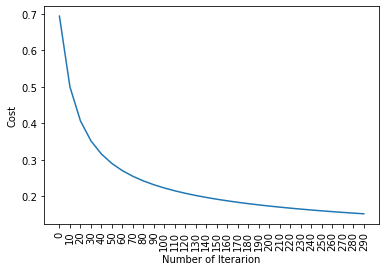

test accuracy: 96.49122807017544 %


In [49]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)    